# Machine learning

**Learn from data**

- Supervised: Requires labels. Example: annotaing images of cats.

- Unsupervised: No labels. 

**Motivation**: ChatGPT 3.5 is mostly unsupervised learning.

**Remark**: Topological data analysis (TDA) is unsupervised learning. 

## Two different datasets

Why do you, intuitively, think that these datasets are different?

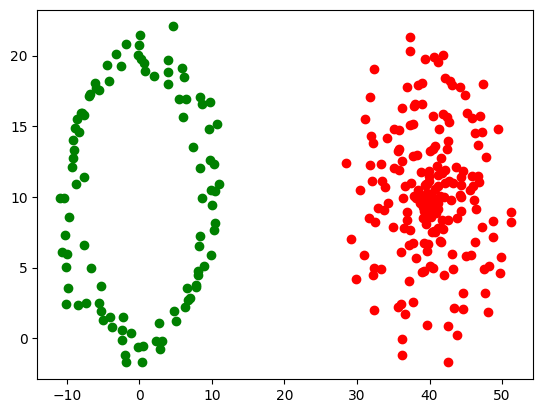

In [1]:
import matplotlib.pyplot as plt

from src.data import generate_circle_data, generate_disk_data

circle_xs, circle_ys = generate_circle_data(100, 10, 0, 10)
disk_xs, disk_ys = generate_disk_data(200, 12, 40, 10)


# Plot the data
plt.scatter(circle_xs, circle_ys, color="green")
plt.scatter(disk_xs, disk_ys, color="red")


## Building a geometrical object from raw data

![structure](./docs/structure_from_data.svg)

# Calculate the shape

![homology](./docs/homology.svg)

## Combined: Persistent homology

**Calculate the qualitative shape for many different radiuses!**

Let us revisit teh circle and disk data...

## Circle data revisited

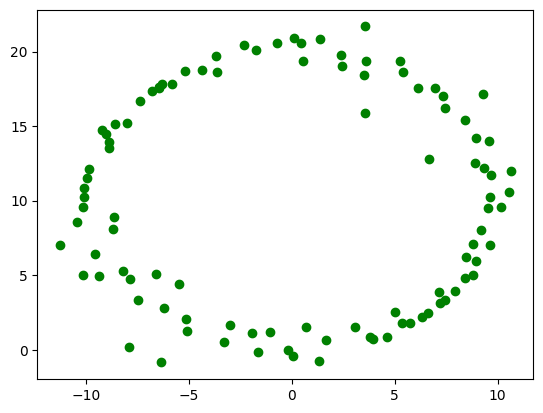

Rips(maxdim=1, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)


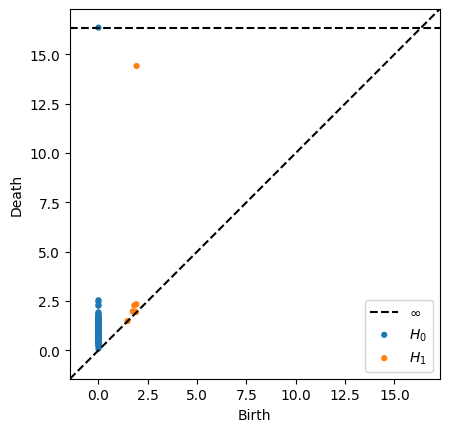

In [3]:
from ripser import Rips

from src.data import generate_circle_data
from src.logic import arrays_to_matrix

circle_xs, circle_ys = generate_circle_data(100, 10, 0, 10)

circle_data = arrays_to_matrix(circle_xs, circle_ys)

plt.scatter(circle_xs, circle_ys, color="green")
plt.show()

model = Rips()
model.fit_transform(circle_data)
model.plot()


**Remarks**:
- Blue dots: observed connected components
- Orange dots: observed circular patterns
- The significance of observed shapes and structures increases as they move further away from the diagonal

Based on the above remarks, we can conclude that the circular data exhibits two significant shapes: a connected component and a circular pattern.

## Disk data revisited

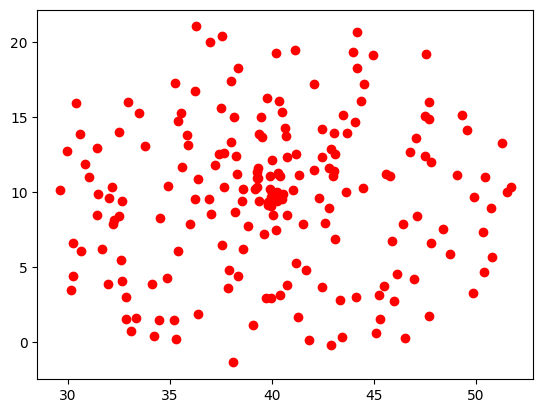

Rips(maxdim=1, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)


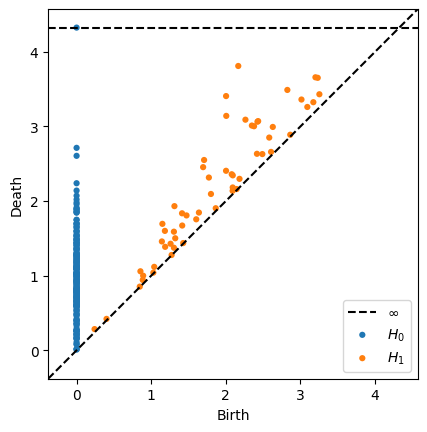

In [4]:
import matplotlib.pyplot as plt
from ripser import Rips

from src.data import generate_disk_data
from src.logic import arrays_to_matrix

disk_xs, disk_ys = generate_disk_data(200, 12, 40, 10)

disk_data = arrays_to_matrix(disk_xs, disk_ys)

plt.scatter(disk_xs, disk_ys, color="red")
plt.show()


model = Rips()
model.fit_transform(disk_data)
model.plot()


# Data has shape!

## Example: Neuroscience

- Grid cells: Neurons that fire according to movement in space. **Spatial awareness**.
- The shape of grid cell activity: https://www.nature.com/articles/s41586-021-04268-7


## Example: Cancer therapy

- Proteins are complex.
- Protein interacts, resulting very complex networks!
- The shape of protein data guiding cancer therapy: https://link.springer.com/article/10.1186/s13062-015-0058-5

# Time series

Record data over time.

Typical example: 
- **Stock prices**
- **Sensor data**

## Example: time series where oscillation decays

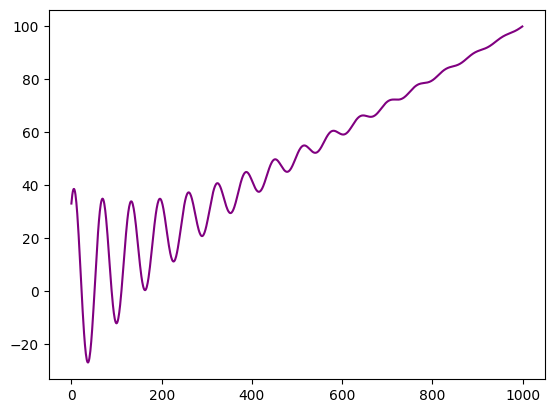

In [5]:
import matplotlib.pyplot as plt

from src.data import get_time_series_with_oscillation_and_decay


time_series = get_time_series_with_oscillation_and_decay()

plt.plot(time_series, color="purple")
plt.show()


## Extract higher dimensional data from time series

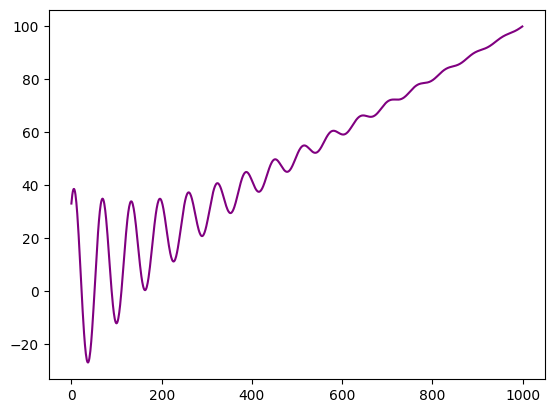

interactive(children=(IntSlider(value=0, description='start', max=900), Output()), _dom_classes=('widget-inter…

In [6]:

import matplotlib.pyplot as plt
from ipywidgets import interactive, fixed

from src.data import get_time_series_with_oscillation_and_decay
from src.logic import time_delay_embedding

time_series = get_time_series_with_oscillation_and_decay()

def interactive_time_delay_embedding(start: int = 0, size: int = 100):
    embedding = time_delay_embedding(time_series[start:start + size], 3)
    plt.scatter(embedding[0], embedding[1], color="green")
    plt.show()

w = interactive(
    interactive_time_delay_embedding,
    start=(0, 900),
    size=fixed(100)
)

plt.plot(time_series, color="purple")
plt.show()

w



## Apply persistent homology...

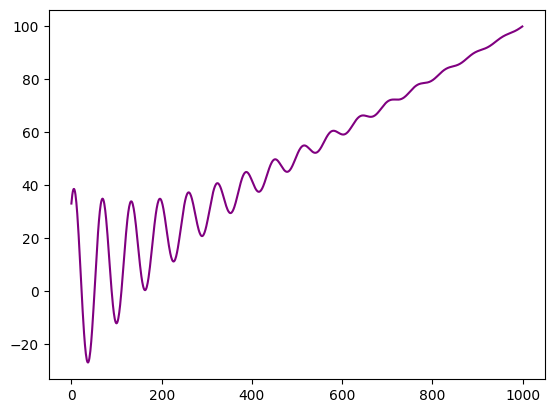

interactive(children=(IntSlider(value=0, description='start', max=900), Output()), _dom_classes=('widget-inter…

In [7]:
import matplotlib.pyplot as plt
from ipywidgets import interactive, fixed

from ripser import Rips

from src.data import get_time_series_with_oscillation_and_decay
from src.logic import arrays_to_matrix, time_delay_embedding

time_series = get_time_series_with_oscillation_and_decay()

def interactive_time_series_barcode(start: int = 0, size: int = 100):
    embedding = time_delay_embedding(time_series[start:start + size], 3)
    data = arrays_to_matrix(embedding[0], embedding[1])
    model = Rips()
    model.fit_transform(data)
    model.plot(xy_range = [-1, 9, 0, 12])

w = interactive(
    interactive_time_series_barcode,
    start=(0, 900),
    size=fixed(100)
)

plt.plot(time_series, color="purple")
plt.show()

w

**observation** We can see that the oscillation dies out because the circle disappears.

## Example: Financial time series

- Indicating financial crashes: https://www.sciencedirect.com/science/article/abs/pii/S0378437117309202


## Final Remarks:

- TDA is a relatively new field
- There is a lot of ongoing research on how to incorporate TDA in ML
  - Keywords: Preprocessing, feature engineering, dimensionality reduction